In [1]:
import pandas as pd


In [2]:
csv_file_path=r"/Users/mac/Documents/GitHub/machine_learning_project/housing/artifact/data_ingestion/2022-07-31-00-34-23/raw_data/housing.csv"

In [4]:
housing_data_frame=pd.read_csv(csv_file_path)

In [5]:
housing_data_frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
import matplotlib as plt

<AxesSubplot:ylabel='Frequency'>

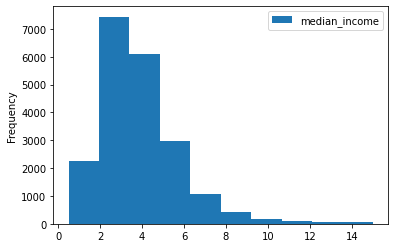

In [13]:
housing_data_frame[["median_income"]].plot(kind='hist')

In [15]:
import numpy as np

In [16]:
housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [19]:
housing_data_frame.income_cat.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

In [21]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [22]:
for train_index,test_index in split.split(housing_data_frame, housing_data_frame["income_cat"]):
    print(train_index,test_index)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [23]:
train_index

array([12655, 15502,  2908, ..., 19263, 19140, 19773])

In [24]:
train_df=housing_data_frame.loc[train_index]

In [26]:
train_df.shape

(16512, 11)

In [27]:
housing_data_frame.shape

(20640, 11)

In [28]:
test_df=housing_data_frame.loc[test_index]

In [29]:
test_df.shape

(4128, 11)

In [30]:
housing_data_frame.columns,housing_data_frame.dtypes

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 longitude              float64
 latitude               float64
 housing_median_age     float64
 total_rooms            float64
 total_bedrooms         float64
 population             float64
 households             float64
 median_income          float64
 median_house_value     float64
 ocean_proximity         object
 income_cat            category
 dtype: object)

In [31]:
housing_data_frame.dtypes.index,housing_data_frame.dtypes.values

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 array([dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
       dtype=object))

In [32]:
data_type = list(map(lambda x:str(x).replace("dtype('","").replace("')","") ,housing_data_frame.dtypes.values))

In [33]:
column=housing_data_frame.columns

In [34]:
dict(zip(column,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}